In [1]:
import time
import numpy as np
from scipy.spatial import distance

#topological data analysis
from ripser import ripser
from persim import plot_diagrams

#plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import Circle

import matplotlib.pyplot as plt
%matplotlib inline

import math
import cmath
from definitions import pentagon

import random
# import numpy as np

#manifold learning and dim red
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

#topological data analysis
from dreimac import CircularCoords, CircleMapUtils, ToroidalCoords, GeometryUtils

#plotting and visualization
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
import pandas as pd
import base64

from matplotlib import cm
# import matplotlib.pyplot as plt
# %matplotlib inline


def plot_barcodes(diagrams, alpha_max, width = 1.5):
    max_dim = len(diagrams)
    fig, axs = plt.subplots(max_dim)
    fig.suptitle('Barcodes')
    for dim in range(max_dim):
        barcode = np.copy(diagrams[dim])
        ind_inf = np.isinf(barcode.T[1])
        barcode[ind_inf, 1] = alpha_max
        h = 1
        for i in range(len(barcode)):
            x = barcode[i]
            y = [h,h]
            axs[dim].plot(x, y, linestyle= '-', c='#1f77b4', linewidth = width)
            if ind_inf[i]:
                axs[dim].scatter([alpha_max],[h],  s=10, marker='>', c='#1f77b4')
            h += 1
        axs[dim].set_xlim(0, 1.05*alpha_max)
        axs[dim].set_ylim(0,h)
        axs[dim].get_yaxis().set_ticks([]);
        axs[dim].spines['right'].set_color('none')
        axs[dim].spines['top'].set_color('none')
        axs[dim].text(0.3,1,'$\mathrm{bcd}^{\mathcal{R}}_{'+str(dim)+'}(X)$', verticalalignment='bottom')

In [2]:
penta2 = np.loadtxt('1. data/G2.txt', delimiter=',')

print(penta2.shape)

(59871, 10)


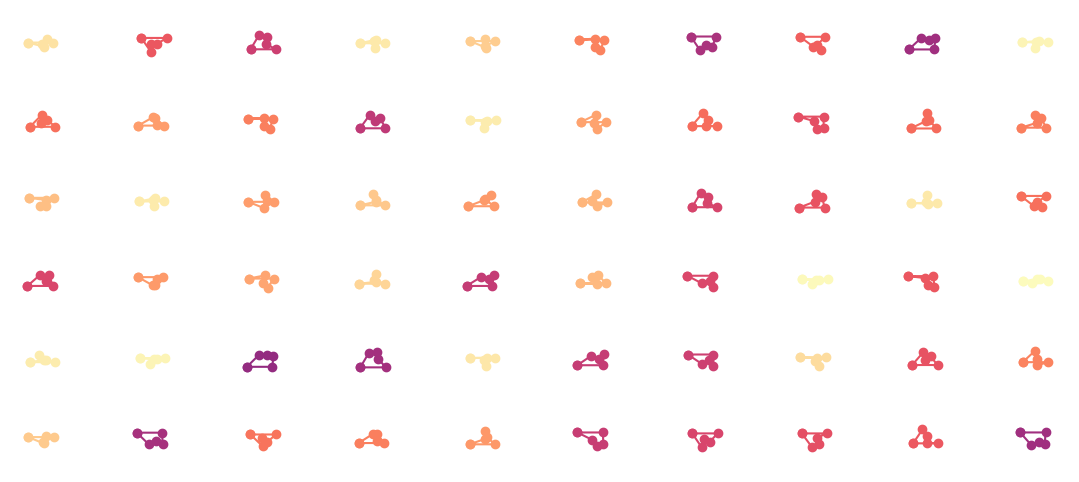

In [3]:
angle_data = np.zeros((penta2.shape[0],5)) # internal angles

for i in range(5):
    ii = (2*i -2)%10
    jj = (2*i - 1)%10
    u = penta2[:, [ii, jj]]
    
    ii = (2*i)%10
    jj = (2*i + 1)%10
    v = penta2[:, [ii , jj]]
    
    ii = (2*i + 2)%10
    jj = (2*i + 3)%10
    w = penta2[:, [ii, jj]]
    
    z = np.sum((u - v)*(w-v), axis = 1)
    
    angle_data[:,i]  = np.arccos( np.minimum(z,1) )
    
energy = np.sum((angle_data - (3/5)*np.pi)**2 , axis = 1)

# plot sample pentagons
plt.figure(figsize=(14,6))
for i in range(60):
    ind = random.randint(0, penta2.shape[0])
    x = penta2[ind].reshape(5,2).T
    cent = np.mean(x,axis=1)
    plt.subplot(6,10,i+1)
    plt.plot(x[0,range(-1,5)], x[1,range(-1,5)] , '-o', c= cm.magma(energy[ind]/np.max(energy)))
    plt.axis('square')
    plt.axis('off')
    plt.xlim(cent[0]-1.3,cent[0]+1.3);
    plt.ylim(cent[1]-1.3,cent[1]+1.3);

In [25]:
n_land = 1000
res = ripser(penta2, n_perm = n_land, maxdim=2, coeff =13, thresh = 1.8)
dgms = res['dgms']
plt.figure(figsize = (4,4))
plot_diagrams(dgms)

KeyboardInterrupt: 

In [5]:
pers1 = dgms[1][:,1] - dgms[1][:,0]
pers2 = dgms[2][:,1] - dgms[2][:,0]

pers1_sorted = np.sort(pers1)[::-1]
pers2_sorted = np.sort(pers2[pers2 < np.Inf])[::-1]

print('Persistence of top 10 1-d features:\n', np.around(pers1_sorted[0:10],decimals=2), '\n')
print('Persistence of top 10 2-d features:\n', np.around(pers2_sorted[0:10],decimals=2))

Persistence of top 10 1-d features:
 [0.36 0.32 0.29 0.12 0.1  0.07 0.07 0.07 0.06 0.06] 

Persistence of top 10 2-d features:
 [0.21 0.03 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.01]


In [41]:
n_land = 1100
k_neigh = 15
dist_mat, pointcloud_permutation = GeometryUtils.landmark_geodesic_distance(penta2, n_land, k_neigh)

In [42]:

cc = CircularCoords(dist_mat , n_landmarks= n_land, distance_matrix=True)
#cc = CircularCoords(penta2 , n_landmarks= n_land)

coho_classes = [1, 2, 3, 4]

circular_coords = []

for i in coho_classes:
    circular_coords.append(cc.get_coordinates(perc = 0.6, cocycle_idx=i, standard_range= False))

In [43]:
thetas= CircleMapUtils.linear_combination(np.array(circular_coords), [[1,0,0,0], [0,1,0,0],[0,0,1,0], [0,0,0,1]])

theta1 = CircleMapUtils.center(thetas[0])
theta2 = CircleMapUtils.center(thetas[1])
theta3 = CircleMapUtils.center(thetas[2])
theta4 = CircleMapUtils.center(thetas[3])


fig = go.Figure(data=[go.Scatter3d(
    x=theta1, y=theta2, z=theta3, 
    mode ='markers', 
    marker=dict(size = 3, color =energy[pointcloud_permutation], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show(renderer='chrome')

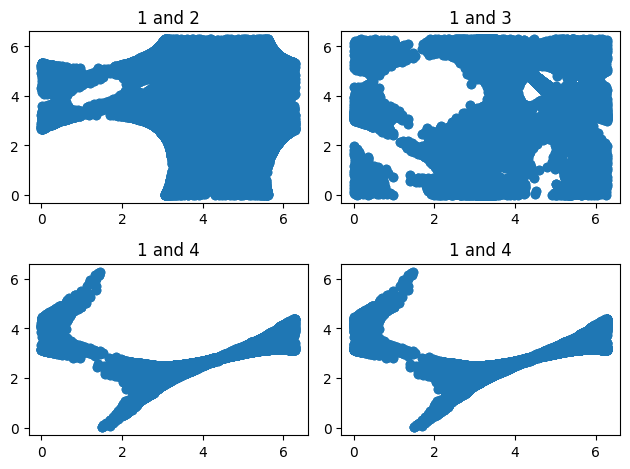

In [44]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For 1 and 2 Function
axis[0, 0].scatter(theta1, theta2)
axis[0, 0].set_title("1 and 2")
  
# For 1 and 3 Function
axis[0, 1].scatter(theta1, theta3)
axis[0, 1].set_title("1 and 3")
  
# For 1 and 4 Function
axis[1, 0].scatter(theta1, theta4)
axis[1, 0].set_title("1 and 4")
  
# For 1 and 5 Function
axis[1, 1].scatter(theta1, theta4)
axis[1, 1].set_title("1 and 4")
  
# Combine all the operations and display
figure.tight_layout()
plt.show()

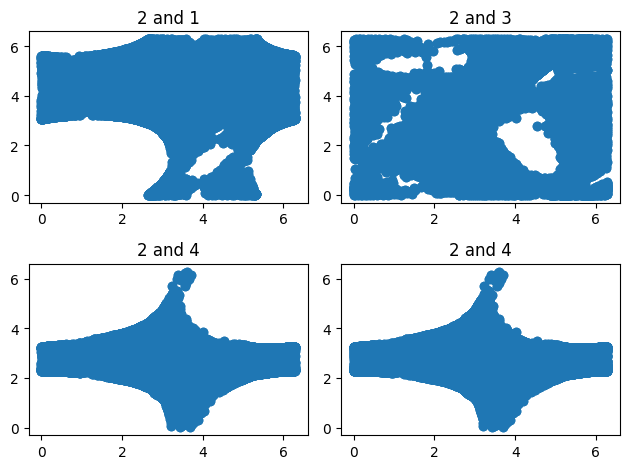

In [45]:
figure, axis = plt.subplots(2, 2)
  
# For 2 and 1 Function
axis[0, 0].scatter(theta2, theta1)
axis[0, 0].set_title("2 and 1")
  
# For 2 and 3 Function
axis[0, 1].scatter(theta2, theta3)
axis[0, 1].set_title("2 and 3")
  
# For 2 and 4 Function
axis[1, 0].scatter(theta2, theta4)
axis[1, 0].set_title("2 and 4")
  
# For 2 and 5 Function
axis[1, 1].scatter(theta2, theta4)
axis[1, 1].set_title("2 and 4")
  
# Combine all the operations and display
figure.tight_layout()
plt.show()

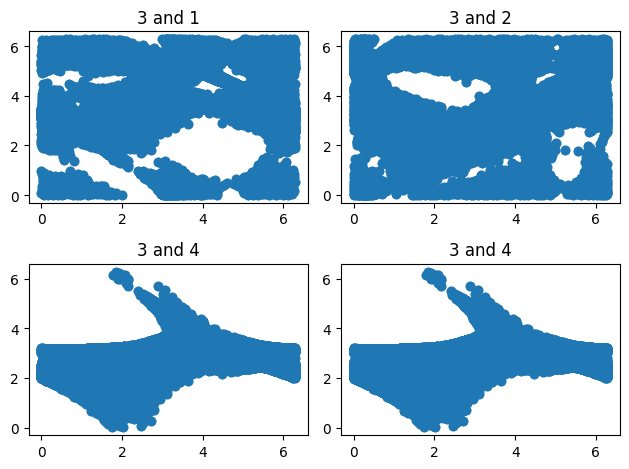

In [46]:
figure, axis = plt.subplots(2, 2)
  
# For 2 and 1 Function
axis[0, 0].scatter(theta3, theta1)
axis[0, 0].set_title("3 and 1")
  
# For 2 and 3 Function
axis[0, 1].scatter(theta3, theta2)
axis[0, 1].set_title("3 and 2")
  
# For 2 and 4 Function
axis[1, 0].scatter(theta3, theta4)
axis[1, 0].set_title("3 and 4")
  
# For 2 and 5 Function
axis[1, 1].scatter(theta3, theta4)
axis[1, 1].set_title("3 and 4")
  
# Combine all the operations and display
figure.tight_layout()
plt.show()

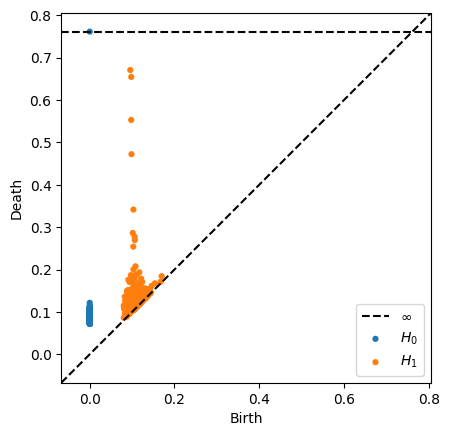

In [12]:
tc = ToroidalCoords(dist_mat, n_landmarks=n_land, distance_matrix=True)
plot_diagrams(tc.dgms_)

In [14]:
cohomology_classes = [0, 1, 2, 3]
toroidal_coords = tc.get_coordinates(cocycle_idxs=cohomology_classes)
toroidal_coords = CircleMapUtils.linear_combination(np.array(circular_coords), [[1,0,0,0], [0,1,0,0],[0,0,1,0], [0,0,0,1]])
t1=CircleMapUtils.center(toroidal_coords[0])
t2=CircleMapUtils.center(toroidal_coords[1])
t3=CircleMapUtils.center(toroidal_coords[2])
t4=CircleMapUtils.center(toroidal_coords[3])

fig = go.Figure(data=[go.Scatter3d(
    x=t1, y=t3, z=t4, 
    mode ='markers', 
    marker=dict(size = 3, color =energy[pointcloud_permutation], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show(renderer='chrome')